# Collaborative Filtering based Recommendation System_Questios

## About Book Crossing Dataset
###This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

## Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

Execute the below cell to load the datasets

In [3]:
import pandas as pd

In [4]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: Dtype

In [5]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']


In [6]:
ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

## Q1 Check no.of records (shape) and features given in each dataset 

In [7]:
print ('Books dim: ',books.shape)
print ('Users Dim: ',users.shape)
print ('ratings Dim: ',ratings.shape)

Books dim:  (271360, 8)
Users Dim:  (278858, 3)
ratings Dim:  (1149780, 3)


In [8]:
print ('Bookes features: \n', books.columns)
print ('')
print ('users features: \n', users.columns)
print ('')
print ('ratings features: \n', ratings.columns)

Bookes features: 
 Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

users features: 
 Index(['userID', 'Location', 'Age'], dtype='object')

ratings features: 
 Index(['userID', 'ISBN', 'bookRating'], dtype='object')


## Q2. Exploring books dataset - 1

In [9]:
books.head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [10]:
books_updated=books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1)

In [11]:
books_updated.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### Check for null vaules and impute them

In [12]:
books_updated.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [13]:
import seaborn as sns

In [14]:
(books_updated['bookAuthor']).value_counts().head()

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: bookAuthor, dtype: int64

In [15]:
books_updated['bookAuthor'].fillna(books_updated.bookAuthor.mode(), inplace=True)

In [16]:
(books_updated['publisher']).value_counts().head()

Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: publisher, dtype: int64

In [17]:
books_updated['publisher'].fillna(books_updated.publisher.mode(), inplace=True)

## Q3. Explore Users Dataset

### Age values below 5 and above 90 do not make much sense for our book rating case...hence replacing these by mean and change the datatype to int - 1

In [18]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
users.isna().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [20]:
users['Age']=users['Age'].replace(users[users['Age']<5],users['Age'].mean())


In [21]:
users['Age']=users['Age'].replace(users[users['Age']>90],users['Age'].mean())

In [22]:
users['Age'].fillna(users.Age.mean(),inplace=True)

In [23]:
users['Age']=users['Age'].astype(int)

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


## Q4. Explore ratings Dataset

In [25]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [26]:
ratings.isna().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [27]:
print(ratings.shape)

(1149780, 3)


### Ratings dataset should have books only which exist in our books dataset. - 1

In [28]:
ratings_modified=ratings[ratings.ISBN.isin(books.ISBN)]
ratings_modified.shape

(1031136, 3)

### Ratings dataset should have ratings from users which exist in users dataset.

In [29]:
ratings_modified=ratings_modified[ratings_modified.userID.isin(users.userID)]
ratings_modified.shape

(1031136, 3)

### Consider only ratings from 1-10 and leave 0s.

In [30]:
ratings_modified['bookRating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [31]:
ratings_modified=ratings_modified[(ratings_modified['bookRating']) != 0]
ratings_modified.shape

(383842, 3)

### Find out which rating has been given highest number of times

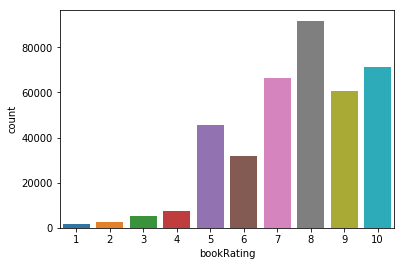

In [32]:
sns.countplot(data=ratings_modified,x='bookRating')

## **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [33]:
count_1=ratings_modified['userID'].value_counts()
ratings_modified=ratings_modified[ratings_modified['userID'].isin(count_1[count_1>100].index)]

In [34]:
count_2=ratings_modified['bookRating'].value_counts()
ratings_modified=ratings_modified[ratings_modified['bookRating'].isin(count_2[count_2>100].index)]

In [35]:
ratings_modified.shape

(102371, 3)

## Q5 Generating ratings matrix from explicit ratings table

#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [36]:
rating_matrix=ratings_modified.pivot(index='userID',columns='ISBN',values='bookRating')


In [37]:
rating_matrix.fillna(0,inplace=True)
rating_matrix.shape

(440, 66076)

## Q6. Generate the predicted ratings using SVD with no.of singular values to be 50

In [38]:
final_data=ratings_modified.merge(users,on='userID')

In [39]:
final_data=final_data.merge(books,on='ISBN')

In [40]:
final_data.isnull().sum()

userID               0
ISBN                 0
bookRating           0
Location             0
Age                  0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            0
dtype: int64

In [41]:
book_count=final_data['bookTitle'].value_counts(ascending=False)
pop_book = book_count.loc[book_count.values > 20].index
len(pop_book)


165

In [42]:
final_result = final_data.loc[final_data.bookTitle.isin(pop_book)]
final_result.shape

(4865, 12)

In [43]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_result[['userID', 'ISBN', 'bookRating']], reader)

In [44]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=123)

In [45]:
from surprise import SVD
from surprise import accuracy
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [46]:
test_pred = svd_model.test(testset)

In [47]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 3.7890


3.7889974573498186

## Take a particular user_id

Lets find the recommendations for user with id 2110
Note: Execute the below cells to get the variables loaded

In [56]:
userID = 2110

## Q7 Get the predicted ratings for userID 2110 and sort them in descending order

In [57]:
svd_model.predict(uid=trainset.to_inner_uid(2110),iid=trainset.to_raw_iid(0))

Prediction(uid=32, iid='0743211383', r_ui=None, est=5, details={'was_impossible': True, 'reason': 'User and item are unkown.'})

In [58]:
len(testset)

1460

## Q8 Create a dataframe with name user_data containing userID 2110 explicitly interacted books

In [59]:
user_data=pd.DataFrame(test_pred)

In [60]:
user_data['was_impossible']=[x['was_impossible'] for x in user_data['details']]

In [61]:
user_data.loc[user_data.was_impossible].head()

,uid,iid,r_ui,est,details,was_impossible
4,120565,B00009EF82,9.0,5.0,"{'was_impossible': True, 'reason': 'User and i...",True
12,130554,1896095011,5.0,5.0,"{'was_impossible': True, 'reason': 'User and i...",True
39,132836,0399146377,10.0,5.0,"{'was_impossible': True, 'reason': 'User and i...",True
40,261105,068484477X,6.0,5.0,"{'was_impossible': True, 'reason': 'User and i...",True
44,11676,0446364495,2.0,5.0,"{'was_impossible': True, 'reason': 'User and i...",True


## Q9 Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [65]:
user_full_info_old=pd.merge(books_updated,ratings_modified,on='ISBN')

In [66]:
user_full_info=pd.merge(user_full_info_old,users,on='userID')
user_full_info.sample()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating,Location,Age
84942,0679419853,A Simple Plan,Scott Smith,1993,Random House Inc,277427,10,"gilbert, arizona, usa",48


## Q10 Get top 10 recommendations for above given userID from the books not already rated by that user

In [67]:
testset_new = trainset.build_anti_testset()

In [68]:
len(testset_new)

169761

In [69]:
(testset_new)

[(109901, '067976402X', 8.047870778267255),
 (109901, '068484267X', 8.047870778267255),
 (109901, '0312976275', 8.047870778267255),
 (109901, '0440226430', 8.047870778267255),
 (109901, '0312291639', 8.047870778267255),
 (109901, '1573225789', 8.047870778267255),
 (109901, '0156027321', 8.047870778267255),
 (109901, '014028009X', 8.047870778267255),
 (109901, '0451161343', 8.047870778267255),
 (109901, '0671702505', 8.047870778267255),
 (109901, '0440225701', 8.047870778267255),
 (109901, '0446609404', 8.047870778267255),
 (109901, '0385484518', 8.047870778267255),
 (109901, '0099143712', 8.047870778267255),
 (109901, '0449212602', 8.047870778267255),
 (109901, '044023722X', 8.047870778267255),
 (109901, '0316693324', 8.047870778267255),
 (109901, '0385311923', 8.047870778267255),
 (109901, '0425081818', 8.047870778267255),
 (109901, '0312971346', 8.047870778267255),
 (109901, '0452284694', 8.047870778267255),
 (109901, '0385302304', 8.047870778267255),
 (109901, '0425163407', 8.047870

In [72]:
svd_model.predict(uid=2110,iid=0)
predictions = svd_model.test(testset_new[0:10000])

In [73]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [75]:
predictions_df.columns=['userId','itemId','est_rating']

In [77]:
predictions_df.head()

,userId,itemId,est_rating
0,109901,067976402X,5.0
1,109901,068484267X,5.0
2,109901,0312976275,5.0
3,109901,0440226430,5.0
4,109901,0312291639,5.0


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

## Q11 Read the Dataset `movies_metadata.csv`

## Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

## Q13  Lets drop the null values in `description` column

## Q14 Keep the first occurance and drop duplicates of each title in column `title`

## Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

## Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

## Q17  Create cosine similarity matrix

## Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

## Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [420]:
joke_df=pd.read_csv('jokes.csv',index_col=0)
joke_df.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
NumJokes,,,,,,,,,,,,,,,,,,,,,
74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [421]:
ratings_joke=joke_df.iloc[:200,:]
ratings_joke.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [422]:
ratings_joke.columns=list(range(0,100))
ratings_joke.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
NumJokes,,,,,,,,,,,,,,,,,,,,,
74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [423]:
ratings_joke.replace(99.00,0,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [426]:
ratings_joke.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
NumJokes,,,,,,,,,,,,,,,,,,,,,
74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [427]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings_joke)


In [428]:
type(ratings_diff)

numpy.ndarray

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [429]:
ratings_diff=pd.DataFrame(ratings_diff)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


In [430]:
mean_diff=ratings_diff.mean()

In [431]:
type(mean_diff)

pandas.core.series.Series

In [432]:
mean_diff.sort_values(ascending=False).head(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64